# PROJECT

###  PASO PRELIMINAR

En primer lugar, importamos la base de datos con la que vamos a trabajar, el Input. 
Además cargamos las librerias que nos serán necesarias, además de estudiar las características principales del DF.

In [66]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})

In [67]:
df=pd.read_csv("../../../Ironhack/attacks.csv")

In [68]:
file_list = [f for f in df]
print(file_list)

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


In [69]:
df.rename(columns={"Sex ":"Sex"}, inplace=True)
df.rename(columns={"Species ":"Species"}, inplace=True)

Esta primera observación nos será suficiente para desechar alguna de las columnas de la DF original.

In [9]:
df= df.drop(["Name","Sex","Injury","Species","Investigator or Source","pdf","href formula","href","original order"], axis=1)

In [5]:
print(df.shape)
print(df.dtypes)
null_cols= df.isnull().sum()

(5992, 15)
Case Number      object
Date             object
Year              int64
Type             object
Country          object
Area             object
Location         object
Activity         object
Age              object
Fatal (Y/N)      object
Time             object
Case Number.1    object
Case Number.2    object
Unnamed: 22      object
Unnamed: 23      object
dtype: object


In [6]:
df["Year"] = df["Year"].astype(str)

# PASO 1. Data Cleaning

Durante este paso, buscaremos a través de la metodología aprendida, realizar un Data Cleaning que nos permita acceder a un DF con datos útiles. 

Realizando este proceso, columna por columna.

# Column Unnamed: 22 & 23

En esta Columna, buscamos observar aquellos valores que no son nulos. Según lo realizado anteriormente, observo en las columnas Unnamed 22 y Unnamed 23 que solo hay 1 y 2 valores, para comprobar cuales son estos valores y si merecería la pena quedarnos con ellos imprimo aquellos que contienen valores no nulos, comprobando que en efecto, no son relevantes (stopped here, Teramo, change filename). Eliminamos por tanto las columnas valoradas anteriormente.

In [7]:
df= df.rename(columns={"Unnamed: 22": "Unnamed"})
df= df.rename(columns={"Unnamed: 23": "Unnamed1"})

Unnamed_not_null = df[df.Unnamed.notnull()]
display(Unnamed_not_null.head())

Unnamed_not_null = df[df.Unnamed1.notnull()]
display(Unnamed_not_null.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time,Case Number.1,Case Number.2,Unnamed,Unnamed1
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,27,Y,09h00,2006.06.18,2006.06.18,stopped here,NaN


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time,Case Number.1,Case Number.2,Unnamed,Unnamed1
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,34,N,NaN,1952.07.13,1952.07.13,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,NaN,Y,NaN,1879.03.10,1879.03.10,NaN,change filename


In [8]:
df= df.drop(["Unnamed","Unnamed1"], axis=1)

# Column Case Number

Para la columna Case Number, encontramos tres columnas similares. Es por esto que me centraré en realizar un análisis de las diferencias encontradas. Corrigiendo alguna de estas diferencias y quedandonos con aquella columna que encontramos "más limpia".

In [9]:
print(df['Case Number'].equals(df['Case Number.1']))
print(df['Case Number.1'].equals(df['Case Number.2']))
print(df['Case Number'].equals(df['Case Number.2']))
case_number=df[["Case Number","Case Number.1","Case Number.2"]]
#nada_igual = case_number[case_number["Case Number"]!=case_number["Case Number.1"]]
nadita_igual = case_number[case_number["Case Number"]!=case_number["Case Number.2"]]
#nad_igual = case_number[case_number["Case Number.1"]!=case_number["Case Number.2"]]
display(nadita_igual)

False
False
False


,Case Number,Case Number.1,Case Number.2
169,2015.07-10,2015.07.10,2015.07.10
4719,1934.01.08.R,1934.02.08.R,1934.02.08.R


In [10]:
df = df.drop(columns=["Case Number"])

In [11]:
case_number2=df[["Case Number.1","Case Number.2"]]
nad_igual = case_number2[case_number2["Case Number.1"]!=case_number2["Case Number.2"]]
display(nad_igual)

,Case Number.1,Case Number.2
4,2016.09.16,2016.09.15
33,2016.07.14.R,2016.07.14.4
97,2015.01.24.b,2016.01.24.b
116,2015.11.07,2015.12.23
121,2015.10.28,2015.10.28.a
3296,1967/07.05,1967.07.05
3569,1962.08.30.b,"1962,08.30.b"
3654,"1961.09,06.R",1961.09.02.R
4177,1952.08.04,1952.08.05
5043,1919.00.00.R,1900.00.00.R


In [12]:
df = df.drop(columns=["Case Number.1"])

In [13]:
df.rename(columns={"Case Number.2":"Case Number"}, inplace=True)

In [14]:
df['Case Number'] = df['Case Number'].str.replace(",",".", regex=False)

In [15]:
df=df[["Case Number","Date","Year","Type", "Country", "Area", "Location", "Activity", "Age", "Fatal (Y/N)", "Time"]]

# Column Country

Teniendo en cuenta que Country va a ser un valor relevante en mi estudio, observo cuales de esos valores nulos 
puedo recuperar de otras columnas, pero a este respecto no encuentro información, no obstante, decido no tener en cuenta dichas filas, por falta de información y porque solo representa el 43/5992) de la población de datos, y por tanto no es representativa, o no debería afectar en gran medida a los resultados del análisis.

In [108]:
filtered = df[(df['Country'].isnull())]

print(filtered.shape)


(0, 7)


Agrupamos England y Scotland como United Kingdom.

In [18]:
df['Country'] = df['Country'].str.replace('ENGLAND', 'UNITED KINGDOM')
df['Country'] = df['Country'].str.replace('SCOTLAND', 'UNITED KINGDOM')

filtered = df[(df['Country']=="UNITED KINGDOM")]
print(filtered.shape)
filtered.head()

(37, 11)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time
526,2012.08.31,31-Aug-12,2012,Provoked,UNITED KINGDOM,Inner Hebrides,Off the Isle of Islay,Shark fishing,53,N,NaN
625,2011.10.28.R,Reported 28-Oct-2011,2011,Unprovoked,UNITED KINGDOM,Moray,Spey Bay,Surfing,26,N,NaN
688,2011.06.14.R,Reported 14-Jun-2011,2011,Boat,UNITED KINGDOM,Cornwall,St. Ives,Fishing,NaN,N,NaN
860,2009.10.17,17-Oct-09,2009,Provoked,UNITED KINGDOM,Fife,Deep Sea World Aquarium,Diving,23,N,14h45
863,2009.10.02,02-Oct-09,2009,Provoked,UNITED KINGDOM,Devon,Mewstone Rock,Fishing,39,N,12h50


El cliente nos ha pedido analizar las características de los ataques por zona en cada país en el que tiene actividad, por lo que solo tendremos en cuenta dichos países. 

In [19]:
COUNTRIES= ["UNITED KINGDOM","MALTA","NEW ZEALAND","FRANCE","CHINA","JAPAN","ITALY","SINGAPORE","AUSTRALIA","USA","CANADA","IRELAND","SOUTH AFRICA", "GERMANY"]
df= df.loc[df["Country"].isin(COUNTRIES)]


In [20]:
counts = df['Country'].value_counts()
display(counts)

USA               2116
AUSTRALIA         1279
SOUTH AFRICA       565
NEW ZEALAND        125
ITALY               71
UNITED KINGDOM      37
JAPAN               32
FRANCE              13
CANADA              10
CHINA                6
SINGAPORE            6
MALTA                5
IRELAND              1
Name: Country, dtype: int64

# Columna Fatal

En esta columna, la limpieza consistirá en configurar el mismo formato para los diferentes valores, además de realizar un Apply para una función que buscará relocalizar las variables, de modo que solo exitan 3 grupos.

In [22]:
df["Fatal (Y/N)"].value_counts()


N          3381
Y           805
UNKNOWN      63
 N            6
#VALUE!       1
n             1
N             1
Name: Fatal (Y/N), dtype: int64

In [23]:
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].str.strip() 

In [24]:
def homog_fatal(f): 
    if f not in ["N", "Y"]: 
        return 'Unknown'
    else: 
        return f
    
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(homog_fatal)
df["Fatal (Y/N)"].value_counts()


N          3388
Y           805
Unknown      73
Name: Fatal (Y/N), dtype: int64

# Columna Type

In [25]:
df["Type"] = df["Type"].str.strip() 
df["Type"].value_counts()

Unprovoked      3100
Provoked         444
Invalid          392
Boat             173
Boating           90
Sea Disaster      67
Name: Type, dtype: int64

In [26]:
df["Type"] = df["Type"].str.replace('Invalid', 'Unspecified')
df["Type"] = df["Type"].str.replace('Sea Disaster', 'Unprovoked')
df.loc[df['Type'].str.startswith('Boat'), "Type"] = 'Provoked'

In [27]:
df["Type"].value_counts()

Unprovoked     3167
Provoked        707
Unspecified     392
Name: Type, dtype: int64

# Columna Time

In [28]:
df["Time"] = df["Time"].str.replace('>', '')
df["Time"] = df["Time"].str.replace('<', '')
df["Time"] = df["Time"].str.replace('h', '')
df["Time"] = df["Time"].str.replace('Before', '')
df["Time"] = df["Time"].str.replace('Early', '')
df["Time"] = df["Time"].str.replace('Earlyafter', '')
df["Time"] = df["Time"].str.replace('A.M.', 'Morning')
df["Time"] = df["Time"].str.replace('AM', 'Morning')
df["Time"] = df["Time"].str.replace('PM', 'Morning')
df["Time"] = df["Time"].str.replace('Sometimebetween0600&08oo', 'Morning')
df["Time"] = df["Time"].str.replace('2rsbeforesunset', 'Morning')
df["Time"] = df["Time"].str.replace('morning', 'Morning')
df["Time"] = df["Time"].str.replace('Nigt', 'Evening')
df["Time"] = df["Time"].str.replace('P.M.', 'Evening')
df["Time"] = df["Time"].str.replace('Dusk', 'Evening')
df["Time"] = df["Time"].str.replace(' ', '')
df["Time"] = df["Time"].str.replace('Late', '')
df["Time"] = df["Time"].str.replace('Mid', '')
df["Time"] = df["Time"].str.replace('Mid-', '')
df["Time"] = df["Time"].str.replace('j', '')
df["Time"] = df["Time"].str.replace('After', '')
df["Time"] = df["Time"].str.replace('Late afternon', 'Afternoon')
df["Time"] = df["Time"].str.replace('Late afternoon', 'Afternoon')
df["Time"] = df["Time"].str.replace('Early afternoon', 'Afternoon')
df["Time"] = df["Time"].str.replace('noon', 'Afternoon')
df["Time"] = df["Time"].str.replace('Midday.', 'Afternoon')
df["Time"] = df["Time"].str.replace('Midday', 'Afternoon')
df["Time"] = df["Time"].str.replace('Possiblysameincidentas2000.08.21', 'Unspecified')
df["Time"] = df["Time"].str.replace('FATAL  (Wire netting installed at local beaces after tis incident.)', 'Unspecified')
df["Time"] = df["Time"].str.replace('FATAL(Wire netting installed at local beaces after tis incident.)', 'Unspecified')
df["Time"] = df["Time"].str.replace('Sortlybefore1300', 'Afternoon')
df["Time"] = df["Time"].str.replace('1101 -time of sip sinking', 'Afternoon')
df["Time"] = df["Time"].str.replace('Between 1100 & 1200', 'Morning')
df["Time"] = df["Time"].str.replace('"sortly before dusk"', 'Evening')
df["Time"] = df["Time"].str.replace('2 rs before sunset', 'Unspecified')
df["Time"] = df["Time"].str.replace('--', 'Unspecified')

In [29]:
df["Time"] = df["Time"].str.replace('Lateafter', '')
df["Time"] = df["Time"].str.replace('after', '')

In [30]:
df["Time"]= df["Time"].fillna("Unspecified")

In [31]:
df.loc[df['Time'].str.startswith('01'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('02'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('03'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('04'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('05'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('06'), 'Time'] = 'Morning'
df.loc[df['Time'].str.startswith('07'), 'Time'] = 'Morning'
df.loc[df['Time'].str.startswith('08'), 'Time'] = 'Morning'
df.loc[df['Time'].str.startswith('09'), 'Time'] = 'Morning'
df.loc[df['Time'].str.startswith('10'), 'Time'] = 'Morning'
df.loc[df['Time'].str.startswith('11'), 'Time'] = 'Morning'
df.loc[df['Time'].str.startswith('12'), 'Time'] = 'Afternoon'
df.loc[df['Time'].str.startswith('13'), 'Time'] = 'Afternoon'
df.loc[df['Time'].str.startswith('14'), 'Time'] = 'Afternoon'
df.loc[df['Time'].str.startswith('15'), 'Time'] = 'Afternoon'
df.loc[df['Time'].str.startswith('16'), 'Time'] = 'Afternoon'
df.loc[df['Time'].str.startswith('17'), 'Time'] = 'Afternoon'
df.loc[df['Time'].str.startswith('18'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('19'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('20'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('21'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('22'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('23'), 'Time'] = 'Evening'
df.loc[df['Time'].str.startswith('00'), 'Time'] = 'Evening'

In [32]:
df["Time"].value_counts()

Unspecified                 1992
Afternoon                   1234
Morning                      702
Evening                      290
day                            5
Sunset                         4
nigt                           4
                               3
non                            2
"Evening"                      2
JustbeforeAfternoon            2
Dawn                           2
Between0500and0800             1
daybreak                       1
Priorto1037                    1
Noon                           1
830                            1
"evening"                      1
Dark                           1
Sortlymidnigt                  1
Daybreak                       1
"dark"                         1
Eveningfall                    1
-Morning                       1
Lunctime                       1
8:04Morning                    1
2oursOpperman                  1
Justbeforesundown              1
dusk                           1
X                              1
"lunc"    

In [33]:
def homog_fatal(h): 
    if h not in ['Afternoon', 'Morning', 'Evening']: 
        return 'Unspecified'
    else: 
        return h
    
df["Time"] = df["Time"].apply(homog_fatal)
df["Time"].value_counts()


Unspecified    2040
Afternoon      1234
Morning         702
Evening         290
Name: Time, dtype: int64

# Column Area

In [34]:
df["Area"].value_counts()

Florida              990
New South Wales      468
Queensland           300
Hawaii               282
California           276
                    ... 
Mercury Islands        1
Kagawa Prefecture      1
Cook islans            1
Aichi Prefecture       1
New Brunswick          1
Name: Area, Length: 183, dtype: int64

In [35]:
df["Area"]= df["Area"].fillna("Unspecified")

In [36]:
count = df['Area'].value_counts()
count[count > 20]
df=df[df['Area'].isin(count[count >20].index)]
df["Area"].value_counts()

Florida                  990
New South Wales          468
Queensland               300
Hawaii                   282
California               276
KwaZulu-Natal            210
Western Cape Province    188
Western Australia        172
Eastern Cape Province    156
South Carolina           144
South Australia          103
North Carolina           100
Victoria                  81
Texas                     71
Torres Strait             70
North Island              65
New Jersey                49
Unspecified               46
Tasmania                  41
South Island              39
Oregon                    28
New York                  27
Northern Territory        23
Name: Area, dtype: int64

# Column Year

In [37]:
df["Year"].value_counts()

2015    111
2014     96
2012     95
2008     90
2013     88
       ... 
1841      1
1803      1
1807      1
1869      1
1859      1
Name: Year, Length: 188, dtype: int64

In [38]:
filtered = df[(df['Year']=="0")]

In [39]:
df["Date"] = df["Date"].str.replace("Before ", '')
df["Date"] = df["Date"].str.replace("Beforer ", '')
df["Date"] = df["Date"].str.replace("No date,Before ", '')
df["Date"] = df["Date"].str.replace("No date, ", '')
df["Date"] = df["Date"].str.replace("?", '')

In [40]:
filtered = df[(df['Year']=="0")]

In [41]:
df['Year'] = np.where(df['Year'] == "0", df['Date'], df["Year"])

In [42]:
#Ya le he dado utilidad a Date y por tanto, procedo a eliminarla

df = df.drop(columns=["Date"])

In [43]:
display(df)

,Case Number,Year,Type,Country,Area,Location,Activity,Age,Fatal (Y/N),Time
0,2016.09.18.c,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,16,N,Afternoon
1,2016.09.18.b,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,36,N,Morning
2,2016.09.18.a,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,43,N,Morning
3,2016.09.17,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,NaN,N,Unspecified
4,2016.09.15,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,NaN,N,Unspecified
...,...,...,...,...,...,...,...,...,...,...
5985,ND.0007,1906,Unprovoked,AUSTRALIA,Unspecified,NaN,Fishing,NaN,Y,Unspecified
5986,ND.0006,1906,Unprovoked,AUSTRALIA,New South Wales,,Swimming,NaN,Y,Unspecified
5987,ND.0005,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,NaN,Y,Unspecified
5988,ND.0004,1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,NaN,Y,Unspecified


In [44]:
df["Year"] = df["Year"].str.replace("Ca. 725 B.C.", '725')
df["Year"] = df["Year"].str.replace("1880-1899", '1899')
df["Year"] = df["Year"].str.replace("08-Jun-1912", '1912')
df["Year"] = df["Year"].str.replace("s", '')
df["Year"] = df["Year"].str.replace("No date (3 days after preceding incident) & prior to 19-Jul-1913", 'No date')
df["Year"] = df["Year"].str.replace("A few years before 1938", '1938')
df["Year"] = df["Year"].str.replace("A few years before 1938", '1938')
df["Year"] = df["Year"].str.replace("After August 1926 and before 1936", '1936')
df["Year"] = df["Year"].str.replace("Circa 1862", '1862')
df["Year"] = df["Year"].str.replace("17-Jul-1916", '1916')
df["Year"] = df["Year"].str.replace("19-Jun-1959", '1959')
df["Year"] = df["Year"].str.replace("         19-Jul-1913", '1913')
df["Year"] = df["Year"].str.replace("3-Jan-1967", '1967')
df["Year"] = df["Year"].str.replace("'Nodate(3dayafterprecedingincident)&priorto19-Jul-1913'", '1913')
df["Year"] = df["Year"].str.replace(" ", '')
df["Year"] = df["Year"].str.replace("Nodate", '0')
df["Year"] = df["Year"].str.replace('"thewar"', '0')
df["Year"] = df["Year"].str.replace("Afewyearbefore1938", '0')

In [45]:
df["Year"] = df["Year"].str.replace("1920-1923", '1923')
df["Year"] = df["Year"].str.replace("1900-1905", '1905')
df["Year"] = df["Year"].str.replace("AfterAugut1926andbefore1936", '1936')


In [46]:
df=df[df.Year != "0(3dayafterprecedingincident)&priorto19-Jul-1913"]

In [47]:
df["Year"] = df["Year"].astype(int)

In [48]:
##The first recorded human fatality by shark was noted as having occurred on July 12, 1771
#but the real shit started in 1916
#https://es.wikipedia.org/wiki/Ola_de_ataques_de_tibur%C3%B3n_de_Nueva_Jersey_de_1916
df = df.drop(df[df['Year']<1916].index)


In [49]:
cutoffs = [1915,1936,1956,1976,1996,2016]
year_labels = ['1916-1936', '1937-1956', '1957-1976','1977-1996','1997-2016']
df['Period'] = pd.cut(df['Year'], cutoffs, labels = year_labels)
df['Period'].value_counts()

1997-2016    1522
1977-1996     665
1957-1976     641
1916-1936     331
1937-1956     327
Name: Period, dtype: int64

# PASO 2. Preparación para el análisis

In [50]:
#por falta de tiempo no puedo limpiar las columnas Location, Activity y Age <Pendiente>
#elimino Year ya que ya he obtenido los periodos
#elimino Case Number porque no lo considero relevante para el análisis
df= df.drop(["Location","Activity","Age","Year","Case Number"], axis=1)

In [51]:
df=df[["Period","Country", "Area","Type","Fatal (Y/N)", "Time"]]
display(df)

,Period,Country,Area,Type,Fatal (Y/N),Time
0,1997-2016,USA,Florida,Unprovoked,N,Afternoon
1,1997-2016,USA,Florida,Unprovoked,N,Morning
2,1997-2016,USA,Florida,Unprovoked,N,Morning
3,1997-2016,AUSTRALIA,Victoria,Unprovoked,N,Unspecified
4,1997-2016,AUSTRALIA,Victoria,Unprovoked,N,Unspecified
...,...,...,...,...,...,...
5967,1916-1936,AUSTRALIA,New South Wales,Unprovoked,Unknown,Unspecified
5972,1916-1936,AUSTRALIA,Queensland,Unprovoked,Y,Unspecified
5973,1916-1936,USA,Florida,Unprovoked,N,Unspecified
5975,1916-1936,SOUTH AFRICA,KwaZulu-Natal,Unprovoked,Y,Unspecified


In [98]:
dfinal = df.sort_values('Country',ascending=True)

display(dfinal)


,Period,Country,Area,Type,Fatal (Y/N),Time
0,1957-1976,AUSTRALIA,Victoria,Unprovoked,N,Afternoon
701,1997-2016,AUSTRALIA,Queensland,Unprovoked,N,Afternoon
702,1937-1956,AUSTRALIA,New South Wales,Provoked,N,Unspecified
703,1997-2016,AUSTRALIA,New South Wales,Unprovoked,N,Afternoon
704,1997-2016,AUSTRALIA,Queensland,Unprovoked,N,Unspecified
...,...,...,...,...,...,...
2264,1997-2016,USA,Florida,Unprovoked,N,Afternoon
2263,1916-1936,USA,South Carolina,Unprovoked,N,Unspecified
2262,1916-1936,USA,California,Provoked,N,Unspecified
2288,1997-2016,USA,Florida,Unprovoked,N,Afternoon


In [ ]:
def prueba(a,b):
    return 'f{a}, {b}'

In [ ]:
dfinal.

In [100]:
for i in list(dfinal.index):
    print(dfinal['Area'][i])

Victoria
Queensland
New South Wales
New South Wales
Queensland
South Australia
Queensland
New South Wales
New South Wales
Victoria
New South Wales
New South Wales
New South Wales
Queensland
Western Australia
Western Australia
Western Australia
Torres Strait
New South Wales
Queensland
New South Wales
Queensland
New South Wales
Queensland
Victoria
Queensland
New South Wales
Torres Strait
New South Wales
New South Wales
Queensland
South Australia
New South Wales
New South Wales
Queensland
Queensland
Torres Strait
Western Australia
South Australia
New South Wales
New South Wales
New South Wales
Tasmania
New South Wales
New South Wales
New South Wales
Queensland
New South Wales
Queensland
New South Wales
Queensland
Queensland
New South Wales
New South Wales
Torres Strait
Torres Strait
Victoria
Torres Strait
Torres Strait
New South Wales
Queensland
Torres Strait
New South Wales
Queensland
Torres Strait
New South Wales
New South Wales
Queensland
New South Wales
New South Wales
Victoria
New So

In [54]:
export_csv = dfinal.to_csv ('../my-code/dfinal.csv', index=None, header=True)

# PASO 3. Análisis y conclusiones

In [5]:
dfanal=pd.read_csv("../dfinal.csv")

In [84]:
def getLocal(country,area):
    return (f'{area}, {country}')

In [ ]:
dfanal[]

In [85]:
getLocal('Victoria', 'Australia')

'Australia, Victoria'

In [91]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")
for i in dfanal['Area']
for i, area in enumerate(dfanal['Area']):
    dfanal['Location'] = getLocal(dfanal['Country'][i], area)
    
dfanal.head()

,Period,Country,Area,Type,Fatal (Y/N),Time,Location
0,1957-1976,AUSTRALIA,Victoria,Unprovoked,N,Afternoon,"Florida, USA"
1,1997-2016,AUSTRALIA,New South Wales,Unprovoked,N,Unspecified,"Florida, USA"
2,1957-1976,AUSTRALIA,Western Australia,Provoked,N,Morning,"Florida, USA"
3,1957-1976,AUSTRALIA,South Australia,Provoked,N,Unspecified,"Florida, USA"
4,1957-1976,AUSTRALIA,Queensland,Unprovoked,Y,Morning,"Florida, USA"


In [105]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [107]:
dfanal['Locate'] = dfanal['Location'].apply(geocode)

KeyboardInterrupt: 

In [92]:
dfanal.Time.value_counts()

Unspecified    1428
Afternoon      1151
Morning         651
Evening         256
Name: Time, dtype: int64

In [59]:
location = geolocator.geocode("Victoria, Australia")

In [62]:
print(location.address)

Victoria, Australia


In [63]:
print((location.latitude, location.longitude))

(-36.5986096, 144.6780052)


In [ ]:
#https://geopy.readthedocs.io/en/stable/

In [6]:
dfanal.head()

,Period,Country,Area,Type,Fatal (Y/N),Time
0,1957-1976,AUSTRALIA,Victoria,Unprovoked,N,Afternoon
1,1997-2016,AUSTRALIA,New South Wales,Unprovoked,N,Unspecified
2,1957-1976,AUSTRALIA,Western Australia,Provoked,N,Morning
3,1957-1976,AUSTRALIA,South Australia,Provoked,N,Unspecified
4,1957-1976,AUSTRALIA,Queensland,Unprovoked,Y,Morning


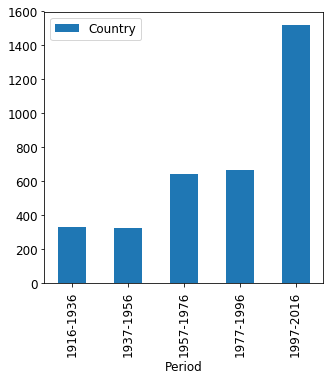

In [36]:
dfanal.groupby('Period').agg({'Country':'count'}).plot.bar()

In [37]:
peri = dfanal.groupby('Period').agg({'Country':'count'})
print(peri)

           Country
Period            
1916-1936      331
1937-1956      327
1957-1976      641
1977-1996      665
1997-2016     1522


In [41]:
list(peri.index)

['1916-1936', '1937-1956', '1957-1976', '1977-1996', '1997-2016']

([<matplotlib.patches.Wedge at 0x7f4057796ad0>,
 [Text(1.0514218557857513, 0.3232832831682562, '1916-1936'),
  Text(0.6912504273630935, 0.8556709920701653, '1937-1956'),
  Text(-0.21083051248503035, 1.0796066390150163, '1957-1976'),
  Text(-1.0778611547966057, 0.21957989657645727, '1977-1996'),
  Text(0.2176368955866428, -1.0782551561107458, '1997-2016')])

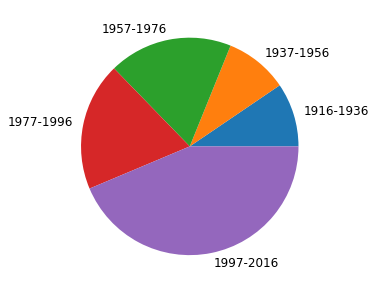

In [43]:
plt.pie(peri['Country'], labels=list(peri.index))

In [26]:
dibu= dfanal.groupby('Fatal (Y/N)').agg({'Period':'count'})
print(dibu)

             Period
Fatal (Y/N)        
N              2941
Unknown          50
Y               495


([<matplotlib.patches.Wedge at 0x7f4057936d10>,
 [Text(-0.9699673172741421, 0.5188096022819969, 'N'),
  Text(0.651206501199023, -0.8865269836818995, 'Unknown'),
  Text(0.9923524917140842, -0.4745909103521142, 'Y')])

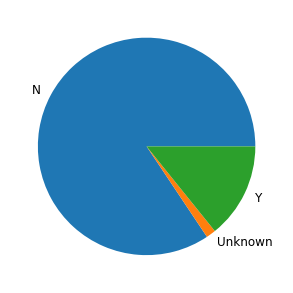

In [34]:
plt.pie(dibu['Period'], labels=['N','Unknown','Y'])

In [7]:
dfanal['Area'].value_counts()

Florida                  952
New South Wales          382
California               270
Queensland               253
Hawaii                   248
KwaZulu-Natal            191
Western Cape Province    174
Western Australia        155
Eastern Cape Province    148
South Carolina           125
South Australia           91
North Carolina            88
Texas                     62
Victoria                  61
Torres Strait             60
North Island              39
New Jersey                35
Tasmania                  32
South Island              29
Unspecified               29
Oregon                    28
Northern Territory        21
New York                  13
Name: Area, dtype: int64

In [57]:
new_df = dfinal.copy()

In [95]:
df4= df[["Country","Area"]]
df4.drop_duplicates()

,Country,Area
0,USA,Florida
3,AUSTRALIA,Victoria
5,AUSTRALIA,Western Australia
7,USA,Hawaii
9,USA,South Carolina
12,USA,California
24,AUSTRALIA,New South Wales
26,AUSTRALIA,Tasmania
28,AUSTRALIA,Queensland
41,USA,North Carolina


In [97]:
df3= pd.crosstab(new_df['Area'],new_df['Type']).apply(lambda r: (r/r.sum())*100, axis=1)
df5= pd.crosstab(new_df['Area'],new_df['Fatal (Y/N)']).apply(lambda r: (r/r.sum())*100, axis=1)
df7= pd.crosstab(new_df['Area'],new_df['Time']).apply(lambda r: (r/r.sum())*100, axis=1)

In [100]:
df6 = pd.merge(df3, df4, on='Area')
df8 = pd.merge(df5, df4, on='Area')
df9 = pd.merge(df7, df4, on='Area')
df6 = df6.drop_duplicates()
df8 = df8.drop_duplicates()
df9 = df9.drop_duplicates()

In [104]:
display(df6)
display(df8)
display(df9)

,Area,Provoked,Unprovoked,Unspecified,Country
0,California,20.370370,68.888889,10.740741,USA
270,Eastern Cape Province,10.135135,83.108108,6.756757,SOUTH AFRICA
418,Florida,9.558824,84.243697,6.197479,USA
1370,Hawaii,5.645161,83.064516,11.290323,USA
1618,KwaZulu-Natal,13.089005,68.062827,18.848168,SOUTH AFRICA
1809,New Jersey,37.142857,54.285714,8.571429,USA
1844,New South Wales,21.727749,69.109948,9.162304,AUSTRALIA
2226,New York,38.461538,23.076923,38.461538,USA
2239,North Carolina,4.545455,84.090909,11.363636,USA
2327,North Island,46.153846,43.589744,10.256410,NEW ZEALAND


,Area,N,Unknown,Y,Country
0,California,90.000000,0.370370,9.629630,USA
270,Eastern Cape Province,82.432432,1.351351,16.216216,SOUTH AFRICA
418,Florida,94.117647,0.945378,4.936975,USA
1370,Hawaii,78.629032,2.016129,19.354839,USA
1618,KwaZulu-Natal,69.633508,0.000000,30.366492,SOUTH AFRICA
1809,New Jersey,82.857143,2.857143,14.285714,USA
1844,New South Wales,77.748691,1.832461,20.418848,AUSTRALIA
2226,New York,84.615385,0.000000,15.384615,USA
2239,North Carolina,89.772727,0.000000,10.227273,USA
2327,North Island,87.179487,5.128205,7.692308,NEW ZEALAND


,Area,Afternoon,Evening,Morning,Unspecified,Country
0,California,31.111111,6.296296,30.370370,32.222222,USA
270,Eastern Cape Province,35.135135,4.729730,24.324324,35.810811,SOUTH AFRICA
418,Florida,43.592437,7.563025,19.222689,29.621849,USA
1370,Hawaii,30.241935,6.048387,28.629032,35.080645,USA
1618,KwaZulu-Natal,38.219895,7.329843,16.230366,38.219895,SOUTH AFRICA
1809,New Jersey,34.285714,2.857143,8.571429,54.285714,USA
1844,New South Wales,24.083770,11.256545,18.586387,46.073298,AUSTRALIA
2226,New York,30.769231,7.692308,7.692308,53.846154,USA
2239,North Carolina,44.318182,9.090909,7.954545,38.636364,USA
2327,North Island,38.461538,7.692308,5.128205,48.717949,NEW ZEALAND


# To be continued...

In [ ]:
df.loc[df['Type'].str.startswith('F'),'Type'] = 'Provoked'

In [ ]:
df1["No_attacks"] = df1["No_attacks"].astype(int)


In [ ]:
df1=df[["Country", "Area"]]
df1['No_attacks'] = df.groupby(['Country'])['Area'].transform('count')
display(df1)
df2["How_attacks"]=df.groupby(['Area'])["Fatal(Y/N)"].transform()

In [ ]:
locasiones=[]
for e in df["Year"]:
    locasiones.append(e)
cosas=[]
for e in locasiones:
    if len(e)>4:
        cosas.append(e) 
print(cosas)

In [11]:
dict_type = {'Unprovoked': ['B', 'S'],
'Not Available': ['I', 'Q']}
for k,v in dict_type.items():
    for e in v:
        df["Type"].str.startswith[e], "Type"] = k

SyntaxError: invalid syntax (<ipython-input-11-d66409295767>, line 5)

In [78]:
df['Type'].value_counts()

Unprovoked       4916
Provoked          557
Not Available     519
Name: Type, dtype: int64

In [71]:
df['Type'].isnull().sum()

0

In [79]:
df['Sex'].value_counts()

M                5405
F                 585
Not Available       2
Name: Sex, dtype: int64

In [73]:
df.fillna('Not Available', inplace=True)

In [74]:
df['Sex'].isna().sum()

0

In [75]:
#df.loc[df['Sex'].str.startswith('M'), 'Sex'] = 'Masc'

In [77]:
dict_type = {'Type':{'Unprovoked': ['B', 'S'],
                    'Not Available': ['I', 'Q']}, 
            'Sex':{'M':['N', 'M'],
                   'Not Available':['.','O','l']}}

for k,v in dict_type.items():
    for ki,vi in v.items():
        for a in vi:
            df.loc[df[k].str.startswith(a, na=False),k] = ki


Type
{'Unprovoked': ['B', 'S'], 'Not Available': ['I', 'Q']}
Unprovoked
['B', 'S']
aquí el error --> B Type Unprovoked
aquí el error --> S Type Unprovoked
Not Available
['I', 'Q']
aquí el error --> I Type Not Available
aquí el error --> Q Type Not Available
Sex
{'M': ['N', 'M'], 'Not Available': ['.', 'O', 'l']}
M
['N', 'M']
aquí el error --> N Sex M
aquí el error --> M Sex M
Not Available
['.', 'O', 'l']
aquí el error --> . Sex Not Available
aquí el error --> O Sex Not Available
aquí el error --> l Sex Not Available
